In [1]:
# HOME
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
# use seaborn plotting defaults
import seaborn as sns; sns.set()


# get the code
import sys
sys.path.append('../code')
from plot import plot_snp
from rollingCNV import one_col_rolling

home = '/Users/mahtin'
# home = '/Users/martinscience'
# standard paths
testdata = os.path.join(home,"Dropbox/Icke/Work/somVar/testdata")
static_path = os.path.join(home, "Dropbox/Icke/Work/static")
cluster_path = os.path.join(home, "mount")
tooldata = os.path.join(home, "Dropbox/Icke/Work/somVar/tooldata")

# tool-specific paths
shell_path = "../shell"
# 
cnvdata = os.path.join(tooldata, "myCNVdata")
output_path = os.path.join(cnvdata, "output")

# the path to the input data
cnv_path = os.path.join(cnvdata, "cnv")
cnvPON_path = cnv_path = os.path.join(cnvdata, "chromCov")
cnv_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/cnv")
cnvPON_path = os.path.join(cluster_path, "scratch/develop/PONcoverage/chromCov")

In [2]:
cnvPON_path

'/Users/mahtin/mount/scratch/develop/PONcoverage/chromCov'

## get the coverage and SNP data

In [3]:
sample = "01_A"
snp_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.snpcov.csv'), sep='\t')
rolling_cov_df = pd.read_csv(os.path.join(output_path, f'rollingCNV/{sample}.rollcov.csv'), sep='\t')

In [4]:
snp_df[:10]

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF
0,chr1,14930,836,836,1.747734,NaN,NaN,64.0,0.505,0.046875
1,chr1,15820,991,991,0.435176,0.161229,0.0,13.0,2.401,0.846154
2,chr1,16949,1410,1410,0.789243,0.161229,0.0,182.0,0.006,0.038462
3,chr1,17365,1689,1689,1.040816,0.161229,0.0,285.0,0.666,0.140351
4,chr1,17375,1699,1699,1.004858,0.161229,0.0,353.0,1.526,0.065156
5,chr1,17379,1703,1703,0.990475,0.161229,0.0,363.0,1.578,0.093664
6,chr1,17384,1708,1708,0.972496,0.161229,0.0,388.0,0.494,0.002577
7,chr1,17452,1776,1776,0.823694,0.161229,0.0,529.0,0.178,0.001890
8,chr1,17614,1938,1938,0.940359,0.161229,0.0,216.0,1.016,0.171296
9,chr1,69270,2994,2994,0.443454,0.161229,0.0,34.0,0.001,1.000000


In [5]:
snp_df.query('log2ratiomean != log2ratiomean')

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF
0,chr1,14930,836,836,1.747734,NaN,NaN,64.0,0.505,0.046875
100647,chr6,28392877,15888508,326367,-0.296437,NaN,NaN,317.0,0.313,0.003155
100648,chr6,28392949,15888559,326439,-0.323889,NaN,NaN,511.0,0.830,0.001957
100649,chr6,28398006,15888702,326582,-0.542943,NaN,NaN,241.0,0.567,0.004149
100650,chr6,28398203,15888835,326715,-0.307855,NaN,NaN,419.0,0.516,0.002387
100651,chr6,28434509,15889069,326949,-0.506112,NaN,NaN,248.0,0.519,0.004032
100652,chr6,28434601,15889161,327041,-0.430786,NaN,NaN,315.0,0.853,0.003175
100653,chr6,28434604,15889164,327044,-0.425962,NaN,NaN,314.0,0.394,0.003185
100654,chr6,28434724,15889284,327164,-0.224901,NaN,NaN,286.0,0.545,0.003497
100655,chr6,28435448,15889646,327525,-0.509878,NaN,NaN,221.0,0.922,0.429864


In [6]:
rolling_cov_df[:3]

,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff
0,chr1,12600,170,170,NaN,NaN,NaN
1,chr1,12650,220,220,3.836977,NaN,NaN
2,chr1,12700,270,270,2.977339,NaN,NaN


### visualize the data

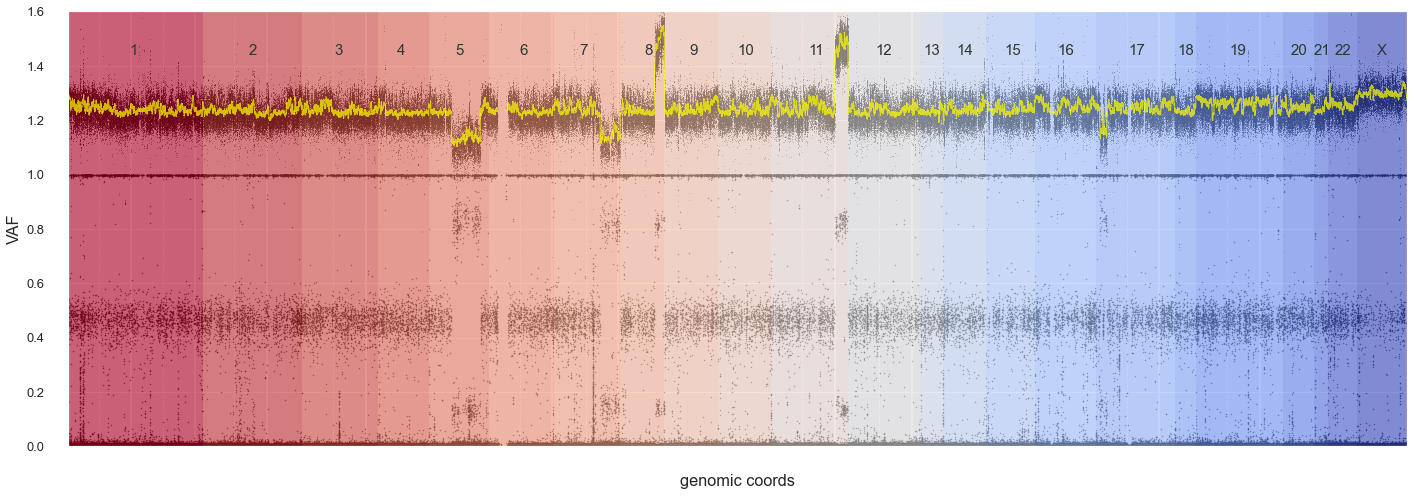

In [16]:
log2 = dict(
        title='log2ratio',
        plot_type='scatter',   # ['line', 'scatter']
        data='log2ratio',
        plot_args=dict(
            linewidth=0.3,
            color='black',
            s=0.2,
            alpha=.7
        )
    )

log2mean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='log2ratiomean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

vaf = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            s=.2,
            color='black',
            alpha=.7
        )
    )
fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)
chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_snp(snp_df, snp_plots=[vaf], cov_plots=[log2, log2mean], chroms='all', region='', **fig_params)

## heteroSNP rolling window
+ #### first, the center cluster has to be fitted via clustering to identify the centers for mean correction
+ #### look at the distribution of VAF and rolling log2ratio
+ #### chrX seems to have different log2ratio (maybe adjusted for XX and XY)

In [ ]:
plt.scatter(snp_df['log2ratiomean'], snp_df['VAF'], s=.1);

In [ ]:
merge = snp_df.query('Chr != "chrX"').query('0.05 < VAF < 0.95 and log2ratiomean == log2ratiomean')
plt.scatter(merge['log2ratiomean'], merge['VAF'], s=.1);

+ #### try DBSCAN

### DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# get the matrix
X = merge[['log2ratiomean', 'VAF']]
rows = X.shape[0]
labels = DBSCAN(eps=.2, min_samples=int(rows/3.5)).fit_predict(X)
plt.scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1, cmap='viridis')
cluster, counts = np.unique(labels, return_counts=True)
len(cluster[cluster != -1])

+ #### DBSCAN seems to be best fitted for removing the center mass as the spread is hard to guess
    * perform a grid search on eps and min_samples to find the maximum center mass with just one cluster
    * better!: perform this grid search on multi-dimensional data

In [ ]:
sample_count = X.shape[0]
max_counts = 0
for i in np.linspace(1,6,10):
    for ep in np.logspace(-1.5,0,10):
        ms = int(sample_count / i)
        model = DBSCAN(eps=0.2, min_samples=ms)
        labels = model.fit_predict(X)
        cluster, counts = np.unique(labels, return_counts=True)
        # get the number of clusters 
        cluster_count = len(cluster[cluster != -1])
        # get the size of cluster 0
        cluster_size = counts[cluster == 0]
        if cluster_count:
            if cluster_size > max_counts:
                best_model = model
        print(f"ep:{ep}|min_samples:{ms}>> {cluster_count} clusters | cluster0: {cluster_size}")

In [ ]:
labels = best_model.fit_predict(X)
plt.scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1, cmap='viridis')

+ #### GMM clustering runs best for fitting the center mass
    * clusters vary depending on init clusters

In [ ]:
from sklearn.mixture import GaussianMixture as GMM

X = merge[['log2ratiomean', 'VAF']]
X
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=2)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ increasing n_init to 20 does the job:

In [ ]:
choice = range(5)
fig, axes = plt.subplots(1, len(choice), figsize=(20,5))
for i, components in enumerate(choice):
    gmm = GMM(n_components=3, covariance_type='diag', n_init=25)
    labels = gmm.fit_predict(X)
    _, counts = np.unique(labels, return_counts=True)
    print(np.max(counts))
    _ = axes[i].scatter(X['log2ratiomean'], X['VAF'], c=labels, s=1)
    # print(f'{components} components - AIC:', gmm.aic(X))
    # print(f'{components} components - BIC:', gmm.bic(X))

+ get_centers computes the means from the best fit centers

In [9]:
from sklearn.mixture import GaussianMixture as GMM

def get_centers(merge_df, runs=25, comps=3, VAF_limits=(0.05, 0.95), exclude_X=True):
    '''
    use GMM to identify the center cluster and get the means from that
    because GMM occasionally does not identify the center cluster,
    I let the GMM proceed several times and minimize the center cluster
    next, the center cluster can be identified as the maximum center
    '''
    VAFmin, VAFmax = VAF_limits
    # fit the centers to the data 
    if exclude_X:
        merge_df = merge_df.query('Chr != "chrX"')     
    X = merge_df.query('@VAFmin < VAF < @VAFmax and log2ratiomean == log2ratiomean')[['log2ratiomean', 'VAF']]

    gmm = GMM(n_components=comps, covariance_type='diag', n_init=runs).fit(X)
    labels = gmm.predict(X)
    # get the size of the 
    _, counts = np.unique(labels, return_counts=True)
    maxcount = np.max(counts)
    centers = pd.DataFrame(gmm.means_, columns=['log2ratio', 'VAF'])
    # get mean_cov and meanVAF from largest cluster
    meanCov, meanVAF = centers.loc[np.argmax(counts)]
    size = maxcount
            
    print(f'GMM using {runs} inits: center size {size} meanVAF = {round(meanVAF, 2)} meanCov={round(meanCov, 2)}')
    
    return meanCov, meanVAF, centers

In [10]:
meanCov, meanVAF, centers = get_centers(merge)
meanVAF

NameError: name 'merge' is not defined

In [11]:
config = {
    'debug': False, # also export the left and right rolling window values (L/R)
    'coverage': {
        'filter': dict(
            min_cov = 30,
            min_PON_cov = 50,
            max_PON_std = 100,
        ),
        'normalize':False,
        'center': True,
        'expand':0.2, # after interpolation of rolling data from filtered df into full df, interpolate missing data within this fraction of window size, set 0 if no interpolation is wanted
        'data': {
            'log2ratio': {
                'mean':100
            }
        }
    },
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        ),
        'normalize': True,
        'center':False,
        'expand': 0.5,
        'data': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        }
    }
}


def center_data(snp_df, config):
    '''
    retrieve the centers for scaling using GMM
    '''
    
    meanCov, meanVAF, _ = get_centers(snp_df, VAF_limits=config['heteroSNP']['filter']['VAF'])
    # center coverage 
    if config['coverage']['center']:
        print("log2ratio centered around", meanCov)
        snp_df.loc[:, 'log2ratiomean'] = snp_df['log2ratiomean'] - meanCov
    if config['heteroSNP']['center']:
        print("heteroSNP centered around", meanVAF)
        snp_df.loc[:, 'VAF'] = snp_df['VAF'] - meanVAF + 0.5
    return snp_df

In [12]:
snp_df = center_data(snp_df, config)
snp_df.query('log2ratiomean != log2ratiomean')

GMM using 25 inits: center size 19568 meanVAF = 0.46 meanCov=-0.13
log2ratio centered around -0.13348117335648071


,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF
0,chr1,14930,836,836,1.747734,NaN,NaN,64.0,0.505,0.046875
100647,chr6,28392877,15888508,326367,-0.296437,NaN,NaN,317.0,0.313,0.003155
100648,chr6,28392949,15888559,326439,-0.323889,NaN,NaN,511.0,0.830,0.001957
100649,chr6,28398006,15888702,326582,-0.542943,NaN,NaN,241.0,0.567,0.004149
100650,chr6,28398203,15888835,326715,-0.307855,NaN,NaN,419.0,0.516,0.002387
100651,chr6,28434509,15889069,326949,-0.506112,NaN,NaN,248.0,0.519,0.004032
100652,chr6,28434601,15889161,327041,-0.430786,NaN,NaN,315.0,0.853,0.003175
100653,chr6,28434604,15889164,327044,-0.425962,NaN,NaN,314.0,0.394,0.003185
100654,chr6,28434724,15889284,327164,-0.224901,NaN,NaN,286.0,0.545,0.003497
100655,chr6,28435448,15889646,327525,-0.509878,NaN,NaN,221.0,0.922,0.429864


In [13]:
def expand_SNPdata(snp_df, config):
    '''
    retrieve a few data columns locally to use rolling windows on
    this needs to be done chromosome-wise in order to avoid gap effects
    '''
    
    # get the new features from VAFs
    snp_df.loc[:,'absVAF'] = np.abs(snp_df['VAF'] - 0.5) * 2
    # get the local VAF difference chrom based
    dfs = []
    for chrom in snp_df['Chr'].unique():
        chrom_df = snp_df.query('Chr == @chrom')
        chrom_df.loc[:, 'deltaVAF'] = np.abs(chrom_df['VAF'] - chrom_df.shift(1)['VAF']).fillna(0)
        dfs.append(chrom_df)
    snp_df = pd.concat(dfs).sort_values('FullExonPos')
    return snp_df

In [14]:
snp2_df = expand_SNPdata(snp_df, config)
snp2_df[:10]

/Users/mahtin/miniconda/envs/PDS-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/mahtin/miniconda/envs/PDS-env/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF
0,chr1,14930,836,836,1.747734,NaN,NaN,64.0,0.505,0.046875,0.906250,0.000000
1,chr1,15820,991,991,0.435176,0.29471,0.0,13.0,2.401,0.846154,0.692308,0.799279
2,chr1,16949,1410,1410,0.789243,0.29471,0.0,182.0,0.006,0.038462,0.923077,0.807693
3,chr1,17365,1689,1689,1.040816,0.29471,0.0,285.0,0.666,0.140351,0.719298,0.101889
4,chr1,17375,1699,1699,1.004858,0.29471,0.0,353.0,1.526,0.065156,0.869688,0.075195
5,chr1,17379,1703,1703,0.990475,0.29471,0.0,363.0,1.578,0.093664,0.812672,0.028508
6,chr1,17384,1708,1708,0.972496,0.29471,0.0,388.0,0.494,0.002577,0.994845,0.091087
7,chr1,17452,1776,1776,0.823694,0.29471,0.0,529.0,0.178,0.001890,0.996219,0.000687
8,chr1,17614,1938,1938,0.940359,0.29471,0.0,216.0,1.016,0.171296,0.657408,0.169406
9,chr1,69270,2994,2994,0.443454,0.29471,0.0,34.0,0.001,1.000000,1.000000,0.828704


2421192


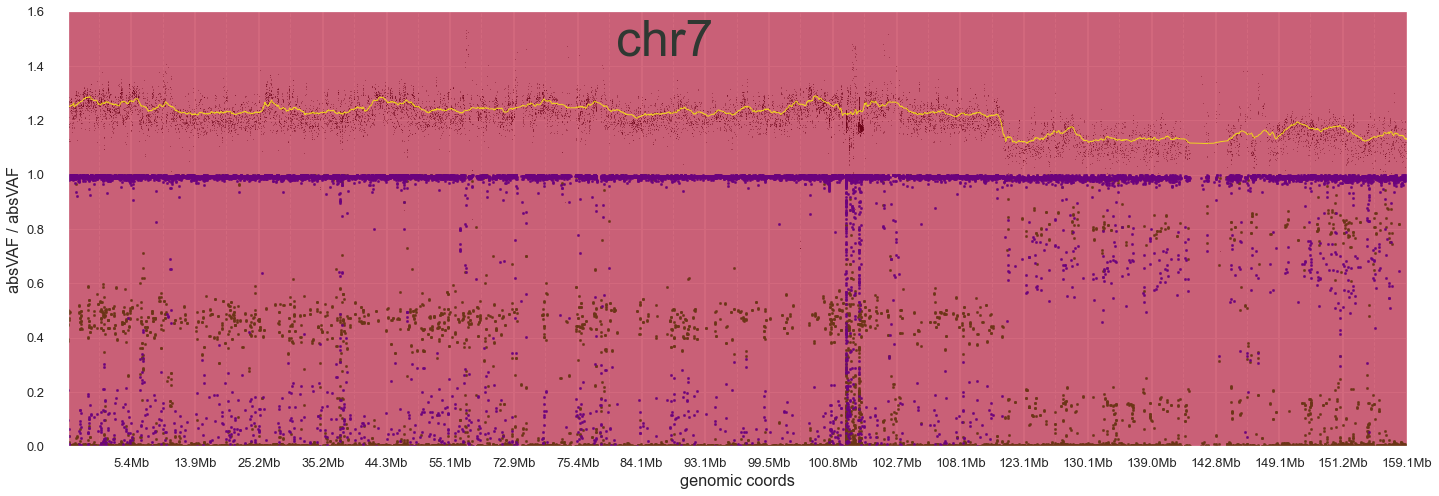

In [17]:
fig_params = dict(
    figsize=(24,8),
    colormap='coolwarm_r',
    color_chroms=True,
    ylim=(0,1),
    cov_offset=.1,  # how much log2ratio=0 is shifted above SNP-data
    cov_height=.5,
    label_size=13
)

vaf = dict(
        title='VAF',
        plot_type='scatter',  # ['line', 'scatter']
        data='VAF',
        plot_args=dict(
            s=.2,
            color='black',
            alpha=.7
        )
    )

absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))
deltavaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='deltaVAF',
        plot_args=dict(
            linewidth=0.5,
            color='green',
            s=5,
            alpha=1
        ))

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_snp(snp2_df, snp_plots=[deltavaf, absvaf], cov_plots=[log2, log2mean], chroms=chroms, region='chr7', **fig_params)

In [18]:
def rolling_snp(snp_df, config):
    '''
    cycle through the chroms and perform rolling window computations of snp data set in config
    '''
    
    # split the params dict for easier access
    params = config['heteroSNP']
    filter_params = params['filter']
    data_params = params['data']
    # reduce the snp_df using config limits
    VAFmin, VAFmax = filter_params['VAF'] 
    minDepth = filter_params['minDepth']
    minEBscore = filter_params['minEB']
    
    # cycle through chroms for 
    chrom_dfs = []
    for chrom in snp_df['Chr'].unique():
        # restrict to chrom
        chrom_df = snp_df.query('Chr == @chrom').sort_values('FullExonPos')        
        # filter df
        filter_df = snp_df.query('@VAFmin < VAF < @VAFmax and Depth >= @minDepth and EBscore > @minEBscore')
        for data_col in data_params.keys():
            for agg in data_params[data_col].keys():
                window_size = data_params[data_col][agg]
                expand_limit = int(params['expand'] * window_size)
                # print(f"Computing rolling window for {agg} of {data_col} with window size {window_size} on {chrom}")
                chrom_df = one_col_rolling(chrom_df, filter_df, data_col, agg, window_size=window_size, expand_limit=expand_limit, normalize=params['normalize'], debug=config['debug'])
        chrom_dfs.append(chrom_df)
    df = pd.concat(chrom_dfs).sort_values('FullExonPos')
    
    return df

In [19]:
snp_config = {
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        ),
        'normalize': True,
        'center':False,
        'expand': 0.5,
        'data': {
            'absVAF': {
                'sum': 20
            },
            'VAF': {
                'std': 20
            },
            'deltaVAF': {
                'std': 20
            }
        }
    }   
}

config.update(snp_config)

snp3_df = rolling_snp(snp2_df, config)
snp3_df

Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data
Normalizing data


,Chr,Pos,FullExonPos,ExonPos,log2ratio,log2ratiomean,log2ratiomeanDiff,Depth,EBscore,VAF,absVAF,deltaVAF,absVAFsum,absVAFsumDiff,VAFstd,VAFstdDiff,deltaVAFstd,deltaVAFstdDiff
0,chr1,14930,836,836,1.747734,NaN,NaN,64.0,0.505,0.046875,0.906250,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,chr1,15820,991,991,0.435176,0.294710,0.0,13.0,2.401,0.846154,0.692308,0.799279,NaN,NaN,NaN,NaN,NaN,NaN
2,chr1,16949,1410,1410,0.789243,0.294710,0.0,182.0,0.006,0.038462,0.923077,0.807693,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,17365,1689,1689,1.040816,0.294710,0.0,285.0,0.666,0.140351,0.719298,0.101889,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,17375,1699,1699,1.004858,0.294710,0.0,353.0,1.526,0.065156,0.869688,0.075195,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9082,chrX,156023260,49469650,1835187,-0.667568,0.212761,0.0,25.0,0.950,0.880000,0.760000,0.023226,0.245356,0.0,0.031465,0.0,0.169323,0.0
9083,chrX,156023266,49469656,1835193,-0.655721,0.212733,0.0,25.0,0.930,0.880000,0.760000,0.000000,0.245356,0.0,0.031465,0.0,0.169323,0.0
9084,chrX,156024203,49469886,1835423,0.148033,0.211677,0.0,53.0,0.392,0.132075,0.735850,0.747925,0.245356,0.0,0.031465,0.0,0.169323,0.0
9085,chrX,156024239,49469922,1835459,0.160322,0.211511,0.0,56.0,0.203,0.267857,0.464286,0.135782,0.245356,0.0,0.031465,0.0,0.169323,0.0


## optimizing rolling windows

### absVAF
+ mean
+ std

In [ ]:
absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))

absvafmean = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='absVAFmean',
        plot_args=dict(
            linewidth=1,
            color='yellow',
            alpha=.7
        )
    )

absvafdiff = dict(
        title='rollinglog2ratio',
        plot_type='line',   # ['line', 'scatter']
        data='absVAFmean',
        plot_args=dict(
            linewidth=1,
            color='blue',
            alpha=.7
        )
    )
snp_config = {
    'heteroSNP': {
        'filter': dict(
            VAF=(0.05,0.95),
            minDepth=30,
            minEB=0.5
        ),
        'normalize': True,
        'center':False,
        'expand': 1,
        'data': {
            'absVAF': {
                'mean':50,
                'sum': 50
            }
        }
    }   
}

config.update(snp_config)
snp3_df = rolling_snp(snp2_df, config)

chroms = ['chr5', 'chr7','chr8', 'chr11', 'chr17']
r1 = 'chr17:3Mb-9Mb'

fig, ax, df, chrom_df = plot_snp(snp3_df, snp_plots=[absvaf,absvafmean, absvafdiff], chroms=chroms, region='chr17', **fig_params)

In [ ]:
absvaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='absVAF',
        plot_args=dict(
            linewidth=0.5,
            color='blue',
            s=5,
            alpha=1
        ))
deltavaf = dict(
        title='absVAF',
        plot_type='scatter',   # ['line', 'scatter']
        data='deltaVAF',
        plot_args=dict(
            linewidth=0.5,
            color='green',
            s=5,
            alpha=1
        ))